# Algoritmos de búsqueda de ruta
La búsqueda de rutas más cortas y eficientes no es reciente. Este problema posee una larga historia y se considera uno de los principales problemas de los grafos. Los algoritmos de búsqueda de ruta encuentran la ruta más corta entre dos o más nodos o evalúan la disponibilidad y la calidad de las rutas. 

## Agoritmo A*
El algoritmo A * mejora el clásico algoritmo Dijkstra. Se basa en la observación de que algunas búsquedas están informadas y que al estar informados podemos tomar mejores decisiones sobre qué caminos tomar a través del gráfico.
## Para que sirve?
El algoritmo de rutas más cortas tiene una importancia sustancial en el proceso de encontrar ubicaciones físicas. Podemos interactuar de forma sencilla con un módulo de este algoritmo en Google Maps, ya que con la ayuda de este algoritmo podemos conocer las rutas más eficientes para llegar de un sitio a otro.

## ejemplo:
ejemplo del camino que recore el algoritmo 
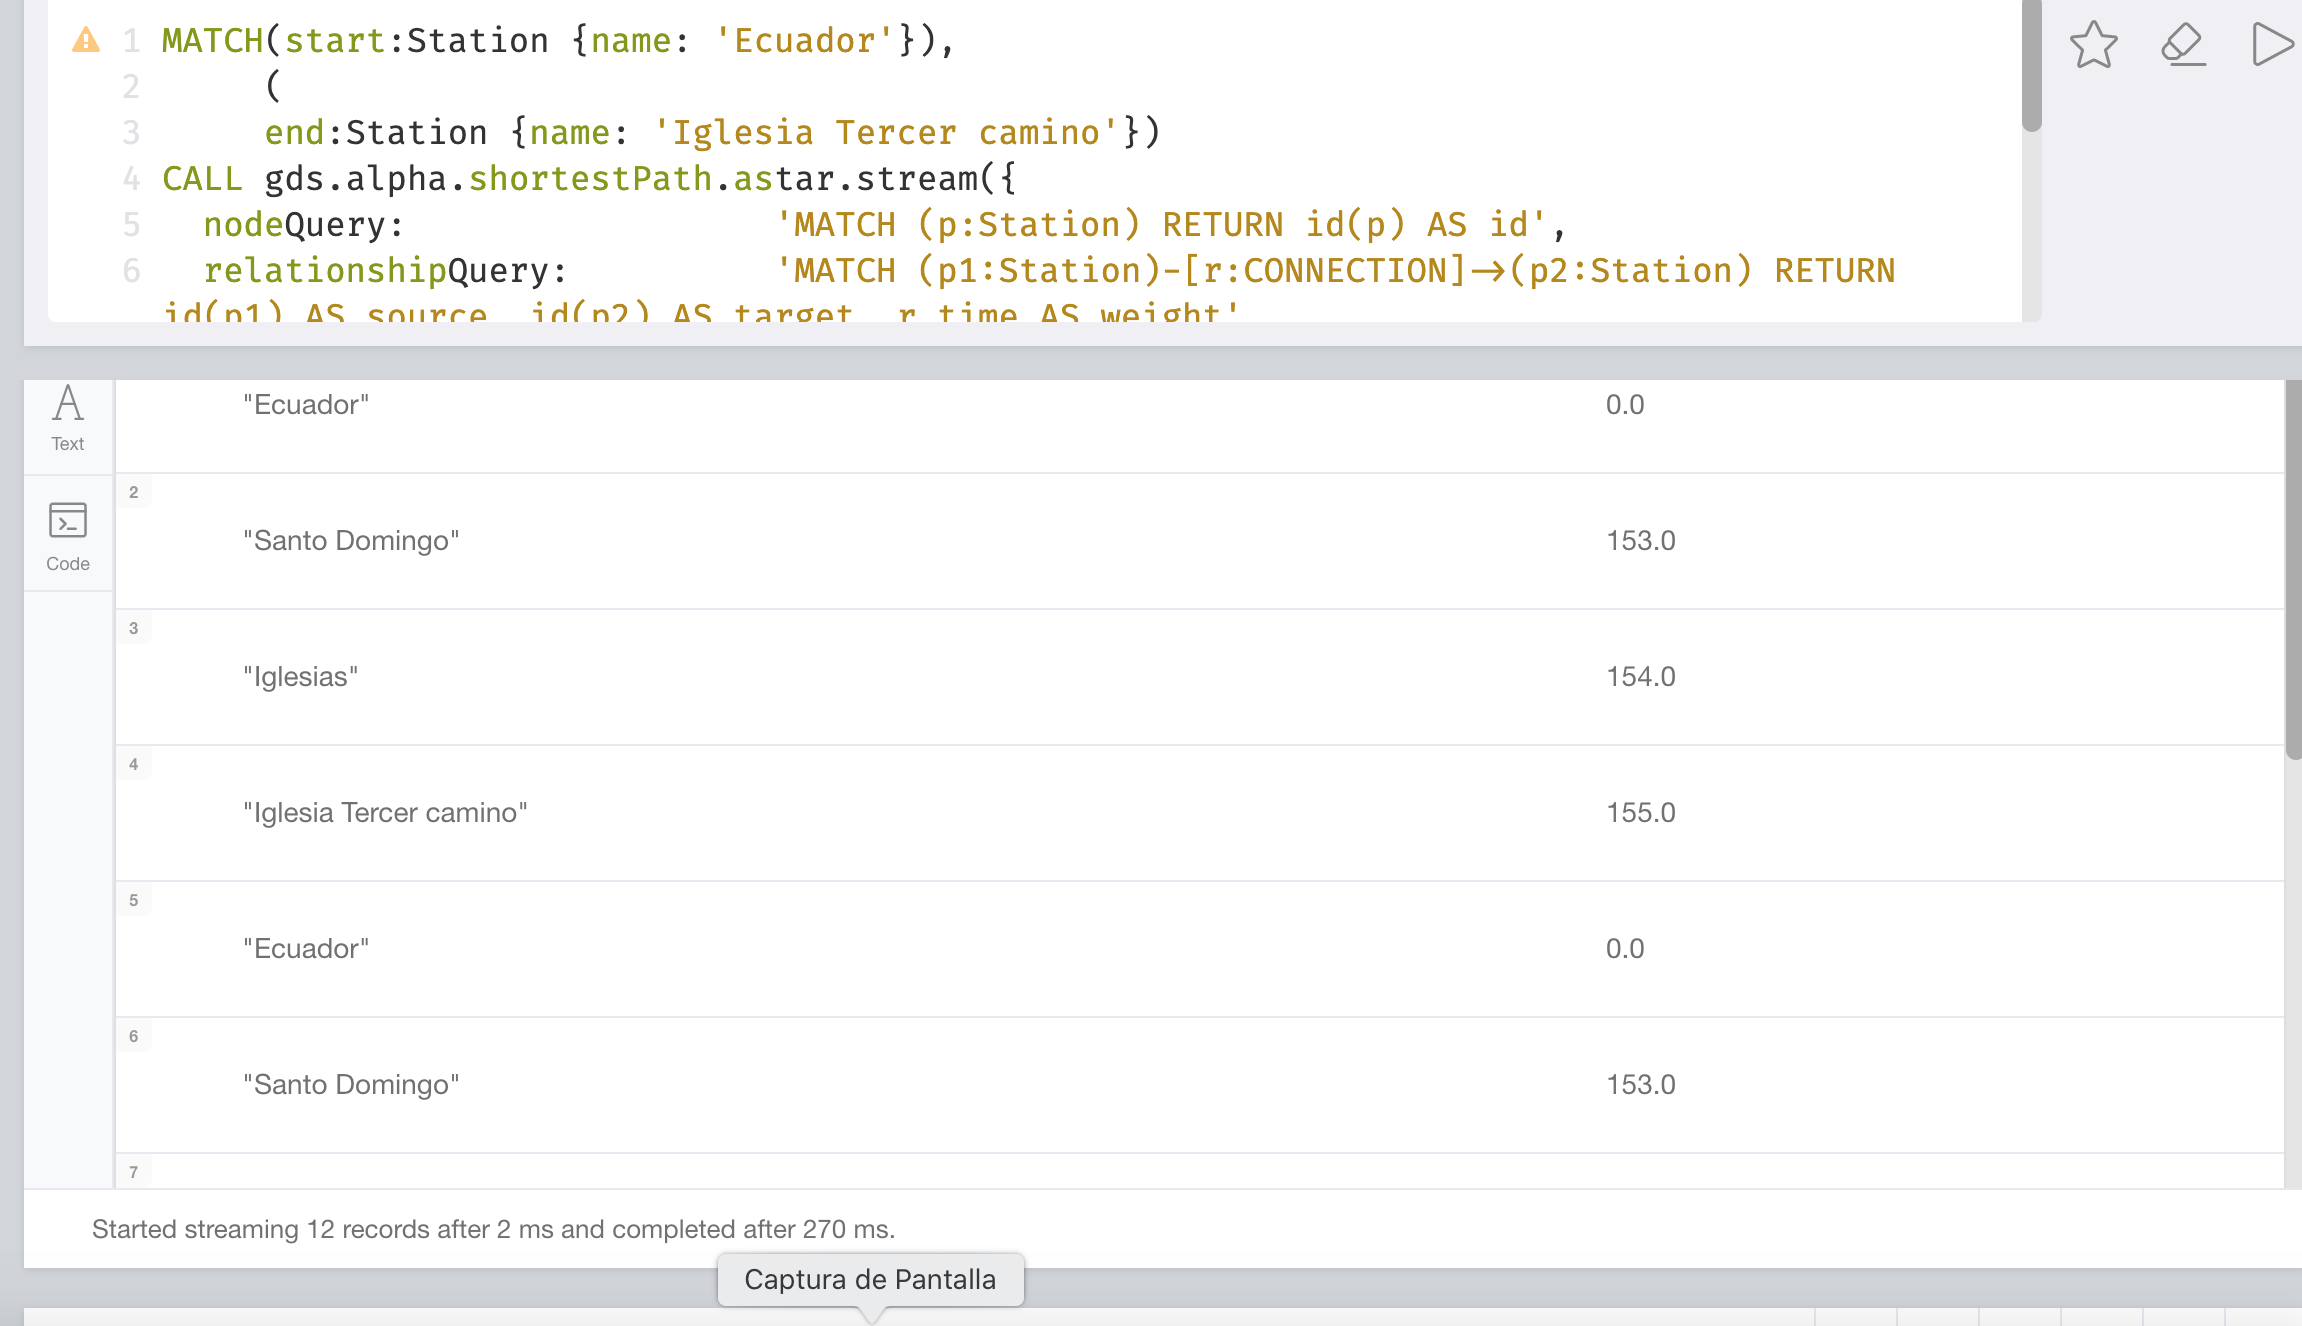
### **codigo de vusqueda:**

MATCH(start:Station {name: 'Ecuador'}),  
     (  
     end:Station {name: 'B'})  
CALL gds.alpha.shortestPath.astar.stream({  
  nodeQuery:                  'MATCH (p:Station) RETURN id(p) AS id',  
  relationshipQuery:          'MATCH (p1:Station)-[r:CONNECTION]->(p2:Station) RETURN id(p1) AS source, id(p2) AS   target, r.time AS weight',  
  startNode:                  start,  
  endNode:  
                              end,  
  relationshipWeightProperty: 'weight',  
  propertyKeyLat:             'latitude',  
  propertyKeyLat:             'longitude'  
})  
YIELD nodeId, cost  
RETURN gds.util.asNode(nodeId).name AS Nodo, cost as Distancia  




In [7]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri,auth=("neo4j", "p4t1t01234"),encrypted=False )


def get_friends_of(tx , name):
    friends = []
        
    result = tx.run("MATCH(start:Station {name: 'Ecuador'}), ( "
                    "end:Station {name: $name }) "
                    "CALL gds.alpha.shortestPath.astar.stream({ "
                    "nodeQuery:  'MATCH (p:Station) RETURN id(p) AS id', "
                    "relationshipQuery:'MATCH (p1:Station)-[r:CONNECTION]->(p2:Station) RETURN id(p1) AS source, id(p2) AS target, r.time AS weight', "
                    "startNode: start, "
                    "endNode: end, "
                    "relationshipWeightProperty: 'weight', "
                    "propertyKeyLat: 'latitude', "
                    "propertyKeyLat: 'longitude'}) "
                    "YIELD nodeId, cost "
                    "RETURN gds.util.asNode(nodeId).name AS Nodo, cost as Distancia ", name=name)
    
    
    for record in result:
        friends.append(record['Nodo'])
        friends.append(record['Distancia'])
    return friends

with driver.session() as session:
    friends = session.read_transaction(get_friends_of , 'Iglesia Rey de Vnamea')
    for friend in friends:
        print(friend)

driver.close()

Ecuador
0.0
Santo Domingo
153.0
Iglesias
154.0
Iglesia Rey de Vnamea
155.3
Ecuador
0.0
Santo Domingo
153.0
Iglesias
154.0
Iglesia Rey de Vnamea
155.3
Ecuador
0.0
Santo Domingo
153.0
Iglesias
154.0
Iglesia Rey de Vnamea
155.3


## Mejoras
adquirir mas conosimiento y practica en el uso de estos algoritmos 
## conclusiones
Cada algoritmo implementado en neoj4 tiene sus características únicas las cuales pueden ser usadas en diferentes ámbitos del mundo informantico y laboral .
## travajos a futuro
aplicar este tipo de algoritmos para la creacion de sistemas mas efisientes y automaticos en la recopilacion de informacion 